## Importing the libraries

In [208]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [209]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ1_intrapoliert/test", 1, 12)
X_train = training_set.iloc[:, 2:].values
y_train = training_set.iloc[:, 1].values
test_set = get_single_dataset("training_data/Typ2_intrapoliert/training")
X_test = test_set.iloc[:, 2:].values
y_test = test_set.iloc[:, 1].values

## Training the Neural Network model

In [210]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    [
        layers.Dense(10, activation="relu", kernel_initializer='he_normal', input_shape=(3,), name="layer1"),
        layers.Dense(8, activation="relu", kernel_initializer='he_normal', name="layer2"),
        layers.Dense(1, activation='relu', name="layer3"),
    ]
)
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.003))

In [211]:
model.fit(X_train, y_train, batch_size=64, epochs=200)

Epoch 1/200
476/476 [==============================] - 1s 699us/step - loss: 2.2988
Epoch 2/200
476/476 [==============================] - 0s 633us/step - loss: 1.2132
Epoch 3/200
476/476 [==============================] - 0s 666us/step - loss: 0.6321
Epoch 4/200
476/476 [==============================] - 0s 633us/step - loss: 0.4503
Epoch 5/200
476/476 [==============================] - 0s 713us/step - loss: 0.3977
Epoch 6/200
476/476 [==============================] - 0s 666us/step - loss: 0.3744
Epoch 7/200
476/476 [==============================] - 0s 666us/step - loss: 0.3581
Epoch 8/200
476/476 [==============================] - 0s 666us/step - loss: 0.3688
Epoch 9/200
476/476 [==============================] - 0s 666us/step - loss: 0.3487
Epoch 10/200
476/476 [==============================] - 0s 680us/step - loss: 0.3591
Epoch 11/200
476/476 [==============================] - 0s 633us/step - loss: 0.3530
Epoch 12/200
476/476 [==============================] - 0s 666us/step - lo

## Predicting the Test set results on independent test set

In [212]:
y_pred = model.predict(X_test)

In [213]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.3483260895152971


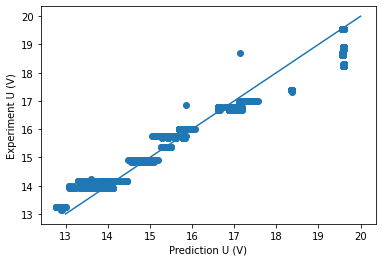

In [214]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction U (V)")
plt.ylabel("Experiment U (V)")
plt.plot([13, 20], [13, 20])
plt.show()

In [215]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9154450897129126

In [216]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

0.5901915701831881


In [217]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

41.325016189634646


In [218]:
np.savetxt("nn2_u_test_train1test2_originalH2_1Dataset.txt", y_test)

In [219]:
np.savetxt("nn2_u_pred_train1test2_originalH2.txt_1Dataset", y_pred)

In [220]:
z = np.arange(1, 4366)

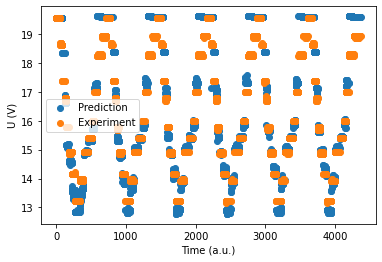

In [221]:
plt.scatter(z, y_pred, label='Prediction')
plt.scatter(z, y_test, label='Experiment')
plt.xlabel("Time (a.u.)")
plt.ylabel("U (V)")
plt.legend(loc='best')
plt.show()

In [225]:
np.savetxt("nn2_z_train1test2.txt", z)

In [226]:
np.savetxt("nn2_y_test_train1test2.txt", y_test)

In [227]:
np.savetxt("nn2_y_pred_train1test2.txt", y_pred)